In [298]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import dateutil
import seaborn as sns
import numpy as np
plt.style.use('seaborn-deep')
colors = {"A330": "#7D94CA", "A321": '#3F569D', "A320": '#1E3174'}
#comment


In [299]:
logbook = "mylogbook.csv"
#"338299H_fltlogbook_20151001_20201103.csv"
columns = ['date','flight_num','city_pair','ac_reg','block_time','off_block','airborne','landing','on_block','takeoff','landing','autoland','commander']
df = pd.read_csv(logbook, encoding="utf-8",skiprows=5)
df.columns = columns

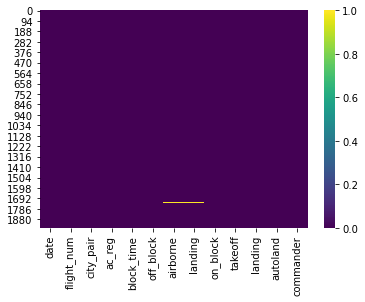

In [300]:
nulls = df.isnull()
sns.heatmap(data=nulls, cmap="viridis")

In [301]:
#remove the last 5 rows where I placed totals in EXCEL
# df.drop(df.tail(5).index,inplace=True)
# df

In [302]:
#change flight number from float to int.
df['flight_num'] = df['flight_num'].astype(int)
df

date  flight_num city_pair ac_reg block_time off_block airborne  \
0      12/9/2012         297   HKG HAN  B-HTF       1:54      0:36     0:53   
1      12/9/2012         296   HAN HKG  B-HTF       1:58      3:35     3:50   
2      13/9/2012         212   HKG HKT  B-HSM       3:17      1:10     1:26   
3      13/9/2012         213   HKT HKG  B-HSM       3:36      5:21     5:32   
4      3/10/2012         636   HKG HGH  B-HSK       2:04      8:02     8:16   
...          ...         ...       ...    ...        ...       ...      ...   
1953   26/9/2020         887   CTU HKG  B-HLT       2:40      5:43     6:14   
1954  15/10/2020         725   HKG KUL  B-LBE       3:49      5:01     5:13   
1955  15/10/2020         734   KUL HKG  B-LBE       3:45      9:46     9:58   
1956  20/10/2020         299   HKG HAN  B-LAA       1:52      9:22     9:35   
1957  20/10/2020         294   HAN HKG  B-LAA       1:49     12:05    12:26   

      landing on_block  takeoff  landing autoland      commander  
0        2:25     2:30        0        0        N    RIXXPIXSREH  
1        5:27     5:33        0        0        N    RIXXPIXSREH  
2        4:24     4:27        0        0        N    RIXXPIXSREH  
3        8:51     8:57        0        0        N    RIXXPIXSREH  
4       10:01    10:06        0        0        N       KYRXSRQW  
...       ...      ...      ...      ...      ...            ...  
1953     8:16     8:23        0        0        N      SGSRRSVXI  
1954     8:44     8:50        0        0        N  REHIRFSYWGL[N  
1955    13:26    13:31        1        1        N  REHIRFSYWGL[N  
1956    11:06    11:14        1        1        N       NSVHERGV  
1957    13:47    13:54        0        0        N       NSVHERGV  

[1958 rows x 13 columns]

In [303]:
new = df['city_pair'].str.split(expand = True)

df['origin'] = new[0]
df['destination'] = new[1]

df



date  flight_num city_pair ac_reg block_time off_block airborne  \
0      12/9/2012         297   HKG HAN  B-HTF       1:54      0:36     0:53   
1      12/9/2012         296   HAN HKG  B-HTF       1:58      3:35     3:50   
2      13/9/2012         212   HKG HKT  B-HSM       3:17      1:10     1:26   
3      13/9/2012         213   HKT HKG  B-HSM       3:36      5:21     5:32   
4      3/10/2012         636   HKG HGH  B-HSK       2:04      8:02     8:16   
...          ...         ...       ...    ...        ...       ...      ...   
1953   26/9/2020         887   CTU HKG  B-HLT       2:40      5:43     6:14   
1954  15/10/2020         725   HKG KUL  B-LBE       3:49      5:01     5:13   
1955  15/10/2020         734   KUL HKG  B-LBE       3:45      9:46     9:58   
1956  20/10/2020         299   HKG HAN  B-LAA       1:52      9:22     9:35   
1957  20/10/2020         294   HAN HKG  B-LAA       1:49     12:05    12:26   

      landing on_block  takeoff  landing autoland      commander origin  \
0        2:25     2:30        0        0        N    RIXXPIXSREH    HKG   
1        5:27     5:33        0        0        N    RIXXPIXSREH    HAN   
2        4:24     4:27        0        0        N    RIXXPIXSREH    HKG   
3        8:51     8:57        0        0        N    RIXXPIXSREH    HKT   
4       10:01    10:06        0        0        N       KYRXSRQW    HKG   
...       ...      ...      ...      ...      ...            ...    ...   
1953     8:16     8:23        0        0        N      SGSRRSVXI    CTU   
1954     8:44     8:50        0        0        N  REHIRFSYWGL[N    HKG   
1955    13:26    13:31        1        1        N  REHIRFSYWGL[N    KUL   
1956    11:06    11:14        1        1        N       NSVHERGV    HKG   
1957    13:47    13:54        0        0        N       NSVHERGV    HAN   

     destination  
0            HAN  
1            HKG  
2            HKT  
3            HKG  
4            HGH  
...          ...  
1953         HKG  
1954         KUL  
1955         HKG  
1956         HAN  
1957         HKG  

[1958 rows x 15 columns]

In [304]:
cols = list(df.columns.values)
cols

['date',
 'flight_num',
 'city_pair',
 'ac_reg',
 'block_time',
 'off_block',
 'airborne',
 'landing',
 'on_block',
 'takeoff',
 'landing',
 'autoland',
 'commander',
 'origin',
 'destination']

In [305]:
df = df[['date',
 'flight_num',
 'city_pair',
 'origin',
 'destination',
 'ac_reg',
 'block_time',
 'off_block',
 'airborne',
 'landing',
 'on_block',
 'takeoff',
 'landing',
 'autoland',
 'commander']]
df

date  flight_num city_pair origin destination ac_reg block_time  \
0      12/9/2012         297   HKG HAN    HKG         HAN  B-HTF       1:54   
1      12/9/2012         296   HAN HKG    HAN         HKG  B-HTF       1:58   
2      13/9/2012         212   HKG HKT    HKG         HKT  B-HSM       3:17   
3      13/9/2012         213   HKT HKG    HKT         HKG  B-HSM       3:36   
4      3/10/2012         636   HKG HGH    HKG         HGH  B-HSK       2:04   
...          ...         ...       ...    ...         ...    ...        ...   
1953   26/9/2020         887   CTU HKG    CTU         HKG  B-HLT       2:40   
1954  15/10/2020         725   HKG KUL    HKG         KUL  B-LBE       3:49   
1955  15/10/2020         734   KUL HKG    KUL         HKG  B-LBE       3:45   
1956  20/10/2020         299   HKG HAN    HKG         HAN  B-LAA       1:52   
1957  20/10/2020         294   HAN HKG    HAN         HKG  B-LAA       1:49   

     off_block airborne  landing  landing on_block  takeoff  landing  landing  \
0         0:36     0:53     2:25        0     2:30        0     2:25        0   
1         3:35     3:50     5:27        0     5:33        0     5:27        0   
2         1:10     1:26     4:24        0     4:27        0     4:24        0   
3         5:21     5:32     8:51        0     8:57        0     8:51        0   
4         8:02     8:16    10:01        0    10:06        0    10:01        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1953      5:43     6:14     8:16        0     8:23        0     8:16        0   
1954      5:01     5:13     8:44        0     8:50        0     8:44        0   
1955      9:46     9:58    13:26        1    13:31        1    13:26        1   
1956      9:22     9:35    11:06        1    11:14        1    11:06        1   
1957     12:05    12:26    13:47        0    13:54        0    13:47        0   

     autoland      commander  
0           N    RIXXPIXSREH  
1           N    RIXXPIXSREH  
2           N    RIXXPIXSREH  
3           N    RIXXPIXSREH  
4           N       KYRXSRQW  
...       ...            ...  
1953        N      SGSRRSVXI  
1954        N  REHIRFSYWGL[N  
1955        N  REHIRFSYWGL[N  
1956        N       NSVHERGV  
1957        N       NSVHERGV  

[1958 rows x 17 columns]

In [306]:
pd.set_option('colwidth', 15)
df


date  flight_num city_pair origin destination ac_reg block_time  \
0      12/9/2012         297   HKG HAN    HKG         HAN  B-HTF       1:54   
1      12/9/2012         296   HAN HKG    HAN         HKG  B-HTF       1:58   
2      13/9/2012         212   HKG HKT    HKG         HKT  B-HSM       3:17   
3      13/9/2012         213   HKT HKG    HKT         HKG  B-HSM       3:36   
4      3/10/2012         636   HKG HGH    HKG         HGH  B-HSK       2:04   
...          ...         ...       ...    ...         ...    ...        ...   
1953   26/9/2020         887   CTU HKG    CTU         HKG  B-HLT       2:40   
1954  15/10/2020         725   HKG KUL    HKG         KUL  B-LBE       3:49   
1955  15/10/2020         734   KUL HKG    KUL         HKG  B-LBE       3:45   
1956  20/10/2020         299   HKG HAN    HKG         HAN  B-LAA       1:52   
1957  20/10/2020         294   HAN HKG    HAN         HKG  B-LAA       1:49   

     off_block airborne  landing  landing on_block  takeoff  landing  landing  \
0         0:36     0:53     2:25        0     2:30        0     2:25        0   
1         3:35     3:50     5:27        0     5:33        0     5:27        0   
2         1:10     1:26     4:24        0     4:27        0     4:24        0   
3         5:21     5:32     8:51        0     8:57        0     8:51        0   
4         8:02     8:16    10:01        0    10:06        0    10:01        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1953      5:43     6:14     8:16        0     8:23        0     8:16        0   
1954      5:01     5:13     8:44        0     8:50        0     8:44        0   
1955      9:46     9:58    13:26        1    13:31        1    13:26        1   
1956      9:22     9:35    11:06        1    11:14        1    11:06        1   
1957     12:05    12:26    13:47        0    13:54        0    13:47        0   

     autoland      commander  
0           N    RIXXPIXSREH  
1           N    RIXXPIXSREH  
2           N    RIXXPIXSREH  
3           N    RIXXPIXSREH  
4           N       KYRXSRQW  
...       ...            ...  
1953        N      SGSRRSVXI  
1954        N  REHIRFSYWGL[N  
1955        N  REHIRFSYWGL[N  
1956        N       NSVHERGV  
1957        N       NSVHERGV  

[1958 rows x 17 columns]

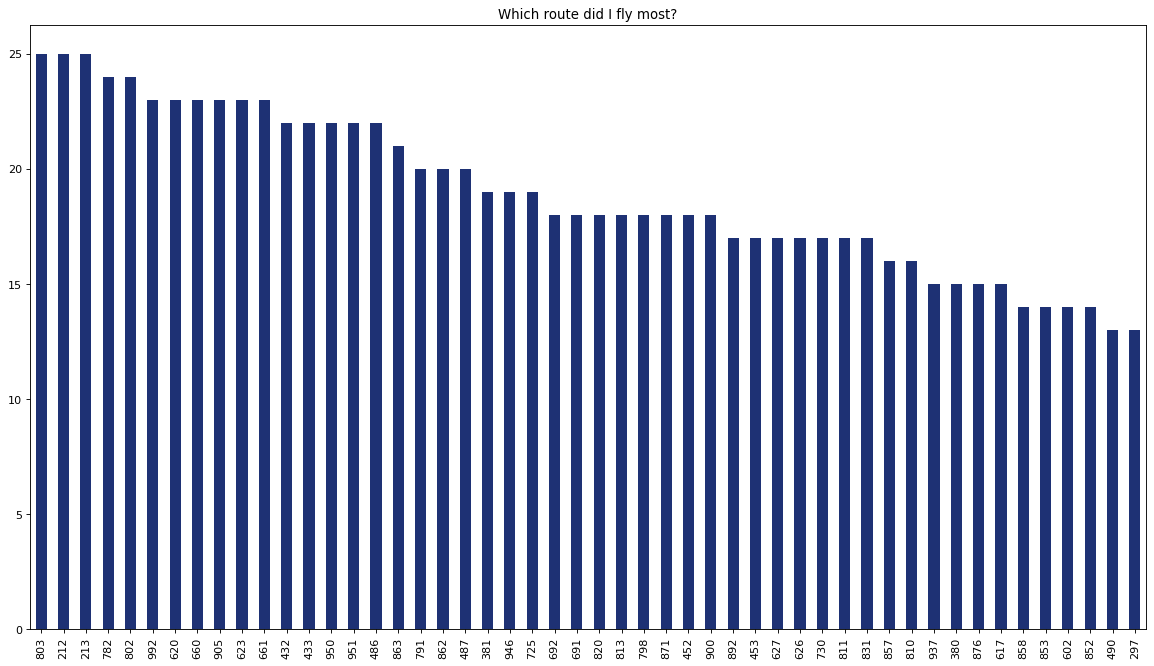

In [307]:
#The most flown flight number. 803 Shanghai, 212 Phuket, 782 Gz.
plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')
df['flight_num'].value_counts().head(50).plot(kind='bar',color= colors["A320"]);

plt.title("Which route did I fly most?")
plt.savefig('Which route did I fly most.png', bbox_inches='tight')

In [308]:
ac_type = df[df['ac_reg'].str.contains("B-HS")]

In [309]:
#added column "ac_type" and assigned value "airbus" to all.

new_df = df.assign(ac_type = "airbus")


new_df

date  flight_num city_pair origin destination ac_reg block_time  \
0      12/9/2012         297   HKG HAN    HKG         HAN  B-HTF       1:54   
1      12/9/2012         296   HAN HKG    HAN         HKG  B-HTF       1:58   
2      13/9/2012         212   HKG HKT    HKG         HKT  B-HSM       3:17   
3      13/9/2012         213   HKT HKG    HKT         HKG  B-HSM       3:36   
4      3/10/2012         636   HKG HGH    HKG         HGH  B-HSK       2:04   
...          ...         ...       ...    ...         ...    ...        ...   
1953   26/9/2020         887   CTU HKG    CTU         HKG  B-HLT       2:40   
1954  15/10/2020         725   HKG KUL    HKG         KUL  B-LBE       3:49   
1955  15/10/2020         734   KUL HKG    KUL         HKG  B-LBE       3:45   
1956  20/10/2020         299   HKG HAN    HKG         HAN  B-LAA       1:52   
1957  20/10/2020         294   HAN HKG    HAN         HKG  B-LAA       1:49   

     off_block airborne  landing  landing on_block  takeoff  landing  landing  \
0         0:36     0:53     2:25        0     2:30        0     2:25        0   
1         3:35     3:50     5:27        0     5:33        0     5:27        0   
2         1:10     1:26     4:24        0     4:27        0     4:24        0   
3         5:21     5:32     8:51        0     8:57        0     8:51        0   
4         8:02     8:16    10:01        0    10:06        0    10:01        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1953      5:43     6:14     8:16        0     8:23        0     8:16        0   
1954      5:01     5:13     8:44        0     8:50        0     8:44        0   
1955      9:46     9:58    13:26        1    13:31        1    13:26        1   
1956      9:22     9:35    11:06        1    11:14        1    11:06        1   
1957     12:05    12:26    13:47        0    13:54        0    13:47        0   

     autoland      commander ac_type  
0           N    RIXXPIXSREH  airbus  
1           N    RIXXPIXSREH  airbus  
2           N    RIXXPIXSREH  airbus  
3           N    RIXXPIXSREH  airbus  
4           N       KYRXSRQW  airbus  
...       ...            ...     ...  
1953        N      SGSRRSVXI  airbus  
1954        N  REHIRFSYWGL[N  airbus  
1955        N  REHIRFSYWGL[N  airbus  
1956        N       NSVHERGV  airbus  
1957        N       NSVHERGV  airbus  

[1958 rows x 18 columns]

In [310]:
new_df.loc[new_df['ac_reg'].str.contains("B-HS"),'ac_type'] = 'A320'
new_df.loc[new_df['ac_reg'].str.contains("B-HT"),'ac_type'] = 'A321'
new_df.loc[new_df['ac_reg'].str.contains("B-L"),'ac_type'] = 'A330'
new_df.loc[new_df['ac_reg'].str.contains("B-HL"),'ac_type'] = 'A330'
new_df.loc[new_df['ac_reg'].str.contains("B-HY"),'ac_type'] = 'A330'
new_df.loc[new_df['ac_reg'].str.contains("B-HW"),'ac_type'] = 'A330'

new_df

date  flight_num city_pair origin destination ac_reg block_time  \
0      12/9/2012         297   HKG HAN    HKG         HAN  B-HTF       1:54   
1      12/9/2012         296   HAN HKG    HAN         HKG  B-HTF       1:58   
2      13/9/2012         212   HKG HKT    HKG         HKT  B-HSM       3:17   
3      13/9/2012         213   HKT HKG    HKT         HKG  B-HSM       3:36   
4      3/10/2012         636   HKG HGH    HKG         HGH  B-HSK       2:04   
...          ...         ...       ...    ...         ...    ...        ...   
1953   26/9/2020         887   CTU HKG    CTU         HKG  B-HLT       2:40   
1954  15/10/2020         725   HKG KUL    HKG         KUL  B-LBE       3:49   
1955  15/10/2020         734   KUL HKG    KUL         HKG  B-LBE       3:45   
1956  20/10/2020         299   HKG HAN    HKG         HAN  B-LAA       1:52   
1957  20/10/2020         294   HAN HKG    HAN         HKG  B-LAA       1:49   

     off_block airborne  landing  landing on_block  takeoff  landing  landing  \
0         0:36     0:53     2:25        0     2:30        0     2:25        0   
1         3:35     3:50     5:27        0     5:33        0     5:27        0   
2         1:10     1:26     4:24        0     4:27        0     4:24        0   
3         5:21     5:32     8:51        0     8:57        0     8:51        0   
4         8:02     8:16    10:01        0    10:06        0    10:01        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1953      5:43     6:14     8:16        0     8:23        0     8:16        0   
1954      5:01     5:13     8:44        0     8:50        0     8:44        0   
1955      9:46     9:58    13:26        1    13:31        1    13:26        1   
1956      9:22     9:35    11:06        1    11:14        1    11:06        1   
1957     12:05    12:26    13:47        0    13:54        0    13:47        0   

     autoland      commander ac_type  
0           N    RIXXPIXSREH    A321  
1           N    RIXXPIXSREH    A321  
2           N    RIXXPIXSREH    A320  
3           N    RIXXPIXSREH    A320  
4           N       KYRXSRQW    A320  
...       ...            ...     ...  
1953        N      SGSRRSVXI    A330  
1954        N  REHIRFSYWGL[N    A330  
1955        N  REHIRFSYWGL[N    A330  
1956        N       NSVHERGV    A330  
1957        N       NSVHERGV    A330  

[1958 rows x 18 columns]

In [311]:
new_df['ac_type'].value_counts()

A330    987
A320    686
A321    285
Name: ac_type, dtype: int64

In [312]:
#find which row has column ac_type with value airbus

df = new_df

#find which row has column ac_type with value airbus
df.loc[df['ac_type'] == "airbus"]

Empty DataFrame
Columns: [date, flight_num, city_pair, origin, destination, ac_reg, block_time, off_block, airborne, landing, landing, on_block, takeoff, landing, landing, autoland, commander, ac_type]
Index: []

In [313]:
#it was the HW series
df.loc[new_df['ac_reg'].str.contains("B-HW"),'ac_type'] = 'A330'

df

date  flight_num city_pair origin destination ac_reg block_time  \
0      12/9/2012         297   HKG HAN    HKG         HAN  B-HTF       1:54   
1      12/9/2012         296   HAN HKG    HAN         HKG  B-HTF       1:58   
2      13/9/2012         212   HKG HKT    HKG         HKT  B-HSM       3:17   
3      13/9/2012         213   HKT HKG    HKT         HKG  B-HSM       3:36   
4      3/10/2012         636   HKG HGH    HKG         HGH  B-HSK       2:04   
...          ...         ...       ...    ...         ...    ...        ...   
1953   26/9/2020         887   CTU HKG    CTU         HKG  B-HLT       2:40   
1954  15/10/2020         725   HKG KUL    HKG         KUL  B-LBE       3:49   
1955  15/10/2020         734   KUL HKG    KUL         HKG  B-LBE       3:45   
1956  20/10/2020         299   HKG HAN    HKG         HAN  B-LAA       1:52   
1957  20/10/2020         294   HAN HKG    HAN         HKG  B-LAA       1:49   

     off_block airborne  landing  landing on_block  takeoff  landing  landing  \
0         0:36     0:53     2:25        0     2:30        0     2:25        0   
1         3:35     3:50     5:27        0     5:33        0     5:27        0   
2         1:10     1:26     4:24        0     4:27        0     4:24        0   
3         5:21     5:32     8:51        0     8:57        0     8:51        0   
4         8:02     8:16    10:01        0    10:06        0    10:01        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
1953      5:43     6:14     8:16        0     8:23        0     8:16        0   
1954      5:01     5:13     8:44        0     8:50        0     8:44        0   
1955      9:46     9:58    13:26        1    13:31        1    13:26        1   
1956      9:22     9:35    11:06        1    11:14        1    11:06        1   
1957     12:05    12:26    13:47        0    13:54        0    13:47        0   

     autoland      commander ac_type  
0           N    RIXXPIXSREH    A321  
1           N    RIXXPIXSREH    A321  
2           N    RIXXPIXSREH    A320  
3           N    RIXXPIXSREH    A320  
4           N       KYRXSRQW    A320  
...       ...            ...     ...  
1953        N      SGSRRSVXI    A330  
1954        N  REHIRFSYWGL[N    A330  
1955        N  REHIRFSYWGL[N    A330  
1956        N       NSVHERGV    A330  
1957        N       NSVHERGV    A330  

[1958 rows x 18 columns]

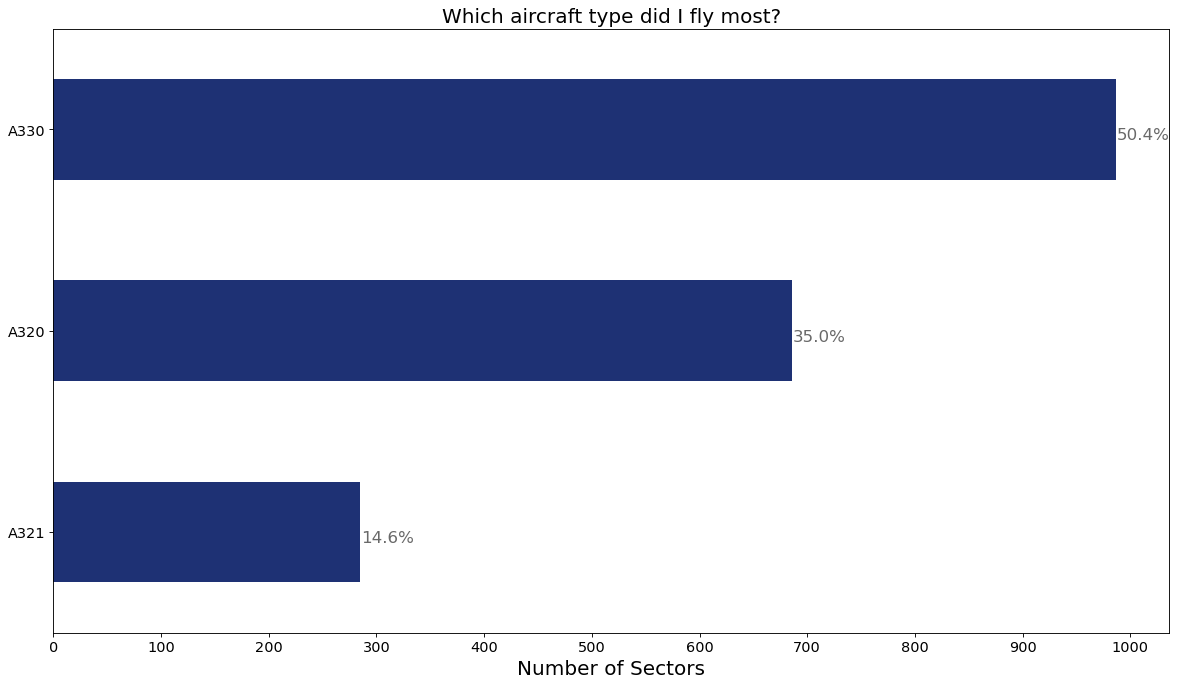

In [314]:
# new_df['ac_type'].value_counts().plot(kind='bar');

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')
ax = new_df['ac_type'].value_counts().plot(kind='barh', fontsize=13, color = colors["A320"]);
ax.set_alpha(0.8)
ax.set_title("Which aircraft type did I fly most?", fontsize=18)
ax.set_xlabel("Number of Sectors", fontsize=18);
ax.set_xticks(range(0,1100,100))

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.3, \
            str(round((i.get_width()/total)*100, 1))+'%', 
            fontsize=15,color='dimgrey')
    
ax.invert_yaxis()

ax;

plt.savefig('Which aircraft type did I fly most.png', bbox_inches='tight')

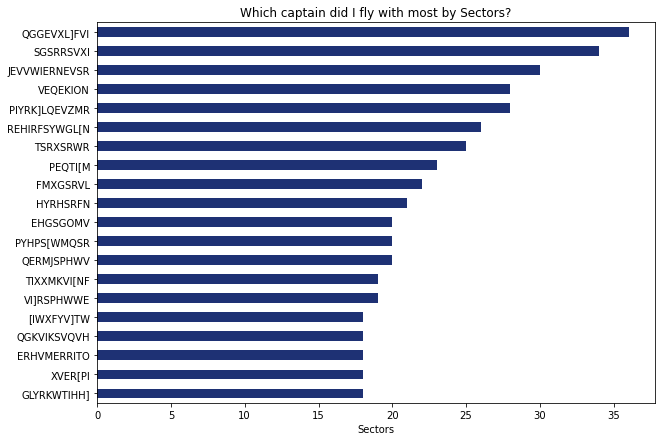

In [315]:
#Which captain did I fly with most?

df["commander"].value_counts().head(20).plot(kind="barh",figsize=(10,7),color = colors["A320"]).invert_yaxis()
plt.title("Which captain did I fly with most by Sectors?")
plt.xlabel("Sectors")
plt.savefig('Which captain did I fly with most by sectors.png',bbox_inches='tight')

In [316]:
df["commander"].value_counts()

QGGEVXL]FVI      36
SGSRRSVXI        34
JEVVWIERNEVSR    30
VEQEKION         28
PIYRK]LQEVZMR    28
                 ..
ELIEVRNT          2
VSYWIWE           2
GLIYRKGOO         2
FYJJSRTK          2
WXEJJSVHFN        2
Name: commander, Length: 228, dtype: int64

In [317]:
df['block_time'] = pd.to_datetime(df['block_time'])
df['block_time'] = df['block_time'].dt.strftime('%H:%M:%S')


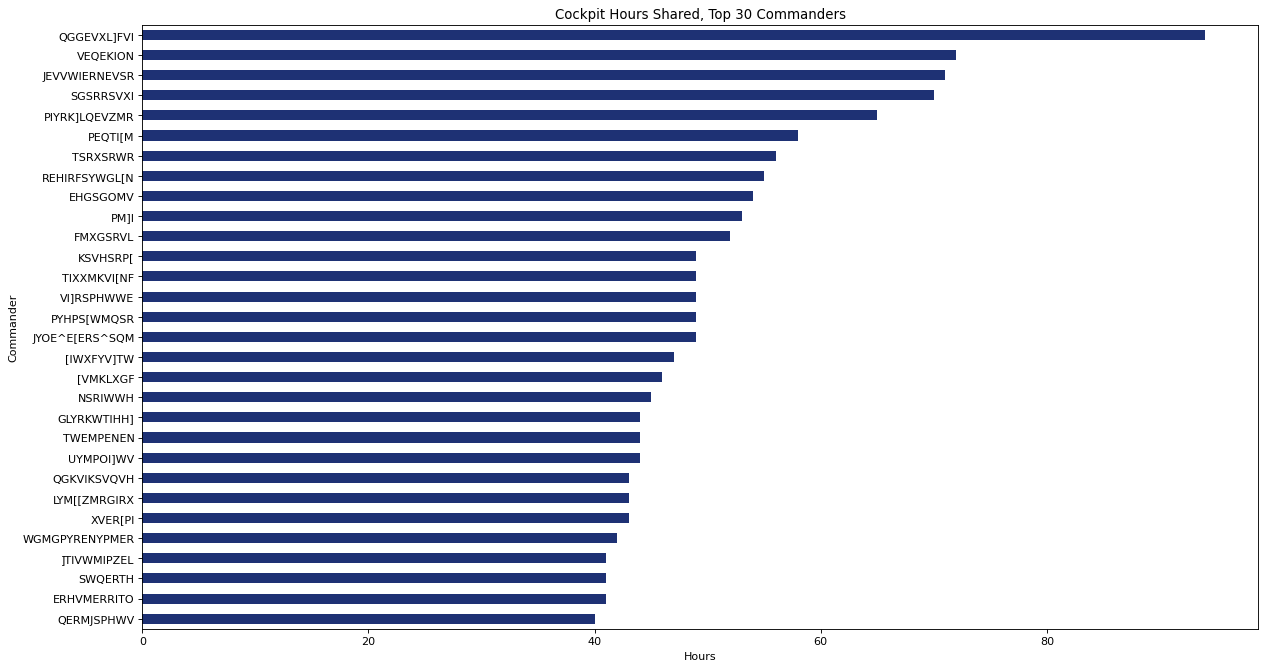

In [318]:
timespent = df.groupby('commander')['block_time'].sum()
timespent = timespent.reset_index().set_index('commander')
plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')

timespent.block_time.astype('timedelta64[h]').sort_values(ascending=True)[-30:].plot.barh(color = colors["A320"])
plt.title("Cockpit Hours Shared, Top 30 Commanders")
plt.xlabel("Hours")
plt.ylabel("Commander")
plt.savefig('Cockpit Hours Shared Top 30 Commanders.png', bbox_inches='tight')

In [319]:
#Total Hours in an Airbus

x = df["block_time"].sum()

def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    print('{} hours, {} minutes'.format(hours, minutes))
    return hours, minutes, seconds
    

convert_timedelta(x)

4933 hours, 26 minutes


(4933, 26, 0)

In [320]:
total_hours = df['block_time'].sum()
total_hours

Timedelta('205 days 13:26:00')

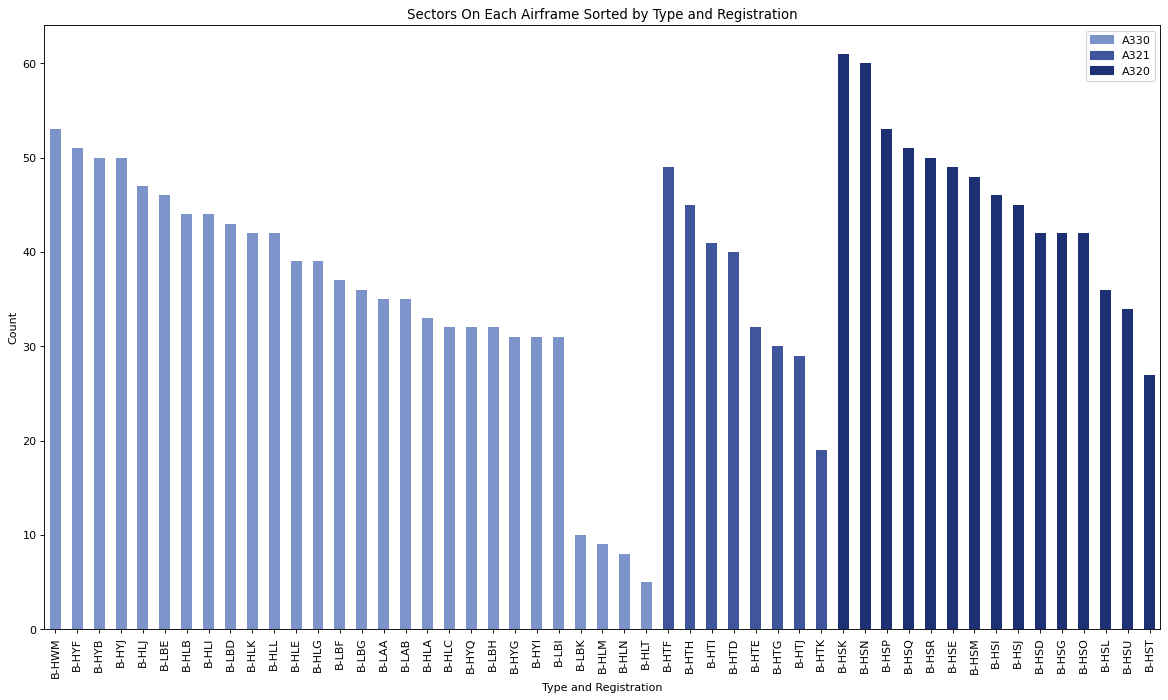

In [321]:
import matplotlib.patches as mpatches

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')
colors = {"A330": "#7D94CA", "A321": '#3F569D', "A320": '#1E3174'}
sort_graph = df.groupby(["ac_type","ac_reg"]).count()
sort_graph = sort_graph.sort_values(by=["ac_type","date"],ascending=False).date
# sort_graph.plot.bar(color= [colors[i] for i in sort_graph.index.get_level_values(0)],legend=False)
sort_graph.plot.bar(color=[colors[i] for i in sort_graph.index.get_level_values(0)])
plt.title("Sectors On Each Airframe Sorted by Type and Registration")
plt.ylabel("Count")
plt.xlabel("Type and Registration")
plt.xticks(np.arange(sort_graph.shape[0], step=1), [i for i in sort_graph.index.get_level_values(1)])

a330_patch = mpatches.Patch(color="#7D94CA", label='A330')
a321_patch = mpatches.Patch(color="#3F569D", label='A321')
a320_patch = mpatches.Patch(color="#1E3174", label='A320')
plt.legend(handles=[a330_patch,a321_patch,a320_patch],loc="best")
plt.savefig('Sectors By Airframe.png', bbox_inches='tight')

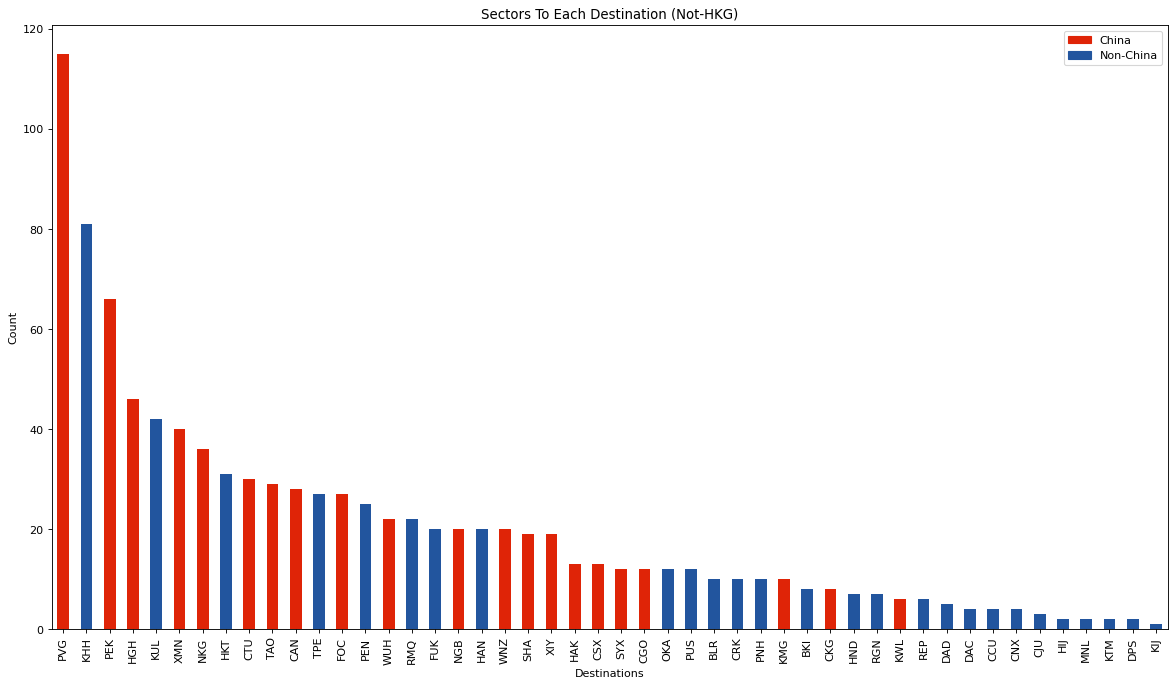

In [322]:
china_l = ['HKG','HGH','SYX','NGB','PVG','CSX','HAK','NKG','CGO','WNZ','XMN','FOC','CKG','CAN','XIY','WUH','CTU','PEK','TAO','KWL','KMG','SHA','TNA',"NNG","KMQ"]
non_china_l = ['HKT','HAN','CRK','OKA','BKI','TPE', 'PNH','RMQ','KHH','FUK','CJU','CNX','RGN','DAD','MNL','CCU','REP','PUS','HND','HIJ','BLR','PEN','KIJ','DPS','KUL','DAC','KTM',"DVO","TKS"]
china_colors = {k:"#df2407" for k in china_l}
non_china_colors = {k:"#22559E" for k in non_china_l}

def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

port_colors =  merge_two_dicts(china_colors, non_china_colors)


plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')
dest_graph = df.destination.value_counts()[1:]
dest_graph.plot.bar(color=["black" if i not in port_colors else port_colors[i] for i in dest_graph.index])
plt.title("Sectors To Each Destination (Not-HKG)")
plt.ylabel("Count")
plt.xlabel("Destinations")


china_patch = mpatches.Patch(color="#df2407", label='China')
non_china_patch = mpatches.Patch(color="#22559E", label='Non-China')

plt.legend(handles=[china_patch,non_china_patch],loc="best")
plt.savefig('Destinations Count Not Hong Kong.png', bbox_inches='tight')

In [323]:
df_icao = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat", header=None, index_col=0)

In [324]:
df_icao.columns = ['airport_name','city_name','country','IATA','ICAO','latitude','longtitude','a','b','c','region','d','e']

In [325]:
df_icao.shape

(7698, 13)

In [326]:
ka_icao = pd.DataFrame(columns=['airport_name','city_name','country','IATA','ICAO','latitude','longtitude','a','b','c','region','d','e'])

for i in list(port_colors.keys()):
    df2 = df_icao[df_icao["IATA"]==i]
    ka_icao = ka_icao.append(df2)

In [327]:
ka_icao.head()

airport_name  city_name    country IATA  ICAO   latitude  longtitude  \
3077  Hong Kong I...  Hong Kong  Hong Kong  HKG  VHHH  22.308901  113.915001   
3386  Hangzhou Xi...   Hangzhou      China  HGH  ZSHC  30.229500  120.433998   
4030  Sanya Phoen...      Sanya      China  SYX  ZJSY  18.302900  109.412003   
3387  Ningbo Lish...      Ninbo      China  NGB  ZSNB  29.826700  121.461998   
3406  Shanghai Pu...   Shanghai      China  PVG  ZSPD  31.143400  121.805000   

       a  b  c          region        d            e  
3077  28  8  U  Asia/Hong_Kong  airport  OurAirports  
3386  23  8  U   Asia/Shanghai  airport  OurAirports  
4030  92  8  U   Asia/Shanghai  airport  OurAirports  
3387  13  8  U   Asia/Shanghai  airport  OurAirports  
3406  13  8  U   Asia/Shanghai  airport  OurAirports

In [328]:
temp_df = ka_icao[["IATA","latitude","longtitude"]]
temp_list = temp_df.values.tolist()
distance_d = {}
for value in temp_list:
    distance_d[value[0]] = (value[1],value[2]) 
distance_d

{'HKG': (22.308901000000002, 113.915001),
 'HGH': (30.22949981689453, 120.43399810791016),
 'SYX': (18.30290031433105, 109.41200256347656),
 'NGB': (29.82670021057129, 121.46199798583984),
 'PVG': (31.143400192260746, 121.80500030517578),
 'CSX': (28.189199447600004, 113.220001221),
 'HAK': (19.93490028381348, 110.45899963378906),
 'NKG': (31.742000579833984, 118.86199951171876),
 'CGO': (34.519699096699995, 113.84100341799999),
 'WNZ': (27.912201, 120.851997),
 'XMN': (24.54400062561035, 118.12799835205078),
 'FOC': (25.935100555419922, 119.66300201416016),
 'CKG': (29.719200134277344, 106.64199829101562),
 'CAN': (23.39240074157715, 113.29900360107422),
 'XIY': (34.447102, 108.751999),
 'WUH': (30.7838, 114.208),
 'CTU': (30.578500747680664, 103.9469985961914),
 'PEK': (40.0801010131836, 116.58499908447266),
 'TAO': (36.2661018372, 120.374000549),
 'KWL': (25.21809959411621, 110.03900146484376),
 'KMG': (25.101944399999997, 102.9291667),
 'SHA': (31.19790077209473, 121.33599853515624

In [329]:
from geopy import distance

#sample

newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(distance.distance(newport_ri, cleveland_oh).nm)

wellington = (-41.32, 174.81)
salamanca = (40.96, -5.50)
print(distance.distance(wellington, salamanca).nm)


ModuleNotFoundError: No module named 'geopy'

In [34]:
def applydistance(origin,destination):
    origin = distance_d[origin]
    destination = distance_d[destination]
    return distance.distance(origin,destination).nm
    

In [35]:
applydistance(df.origin.values[0],df.destination.values[0])

457.40397603886714

In [36]:
df["distanceflown"] = np.arange(df.shape[0])
df.distanceflown = df.distanceflown.apply(lambda x: round(applydistance(df.origin.values[x],df.destination.values[x])),0)

###df.distanceflown = df.distanceflown.apply(applydistance(df.origin,df.destination))

In [37]:
df.distanceflown.sum()

1393061

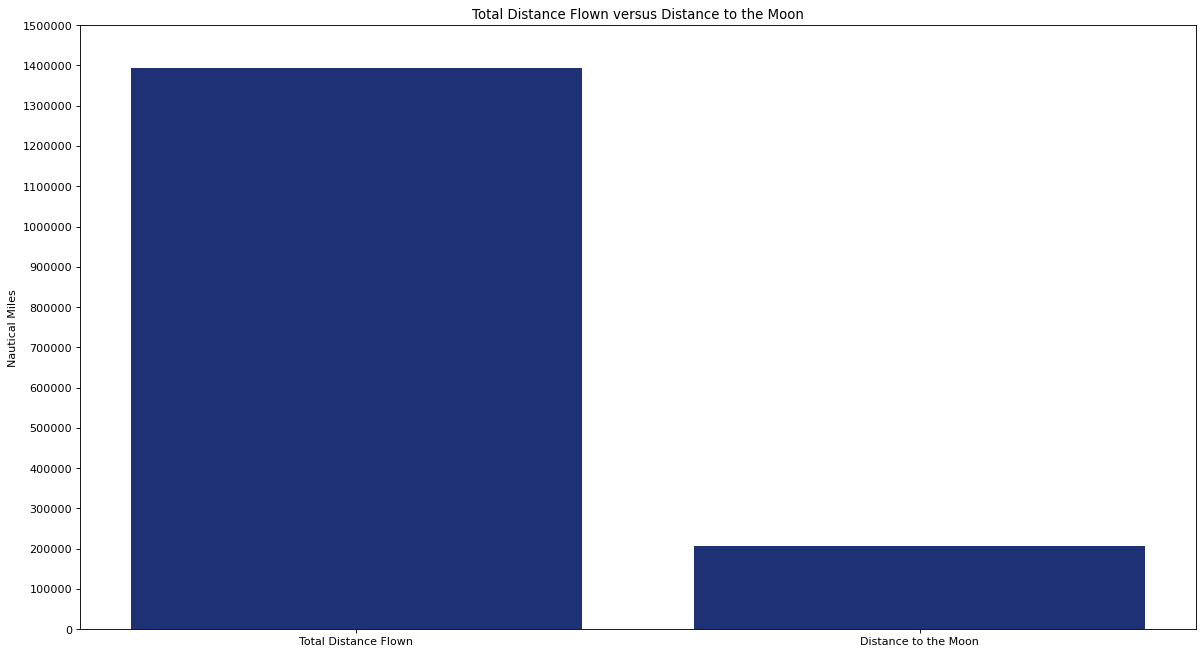

In [38]:
import matplotlib.ticker as mtick

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w')
total_distance_flown = df.distanceflown.sum()
distance_to_moon = 207560.475

quick_d = {"Total Distance Flown": total_distance_flown,"Distance to the Moon":distance_to_moon}
plt.bar(quick_d.keys(), quick_d.values(), color=colors['A320'])
plt.title("Total Distance Flown versus Distance to the Moon")
plt.yticks(np.arange(0, 1600000, step=100000))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.ylabel("Nautical Miles")
plt.savefig('Total Distance Flown versus Distance to the Moon.png', bbox_inches='tight')

In [39]:
###df.distanceflown = df.distanceflown.apply(applydistance(df.origin,df.destination))